In [37]:
import pandas as pd
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import des données

In [10]:
apple = pd.read_csv("../data/AAPL.csv")

In [11]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769093,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557426,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096228,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001543,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044611,458707200


In [12]:
apple["Date"] = pd.to_datetime(apple["Date"])
apple = apple[["Date", "Close"]]

In [16]:
fig = go.Figure()

# Ajout de la série financière
fig.add_trace(go.Scatter(x = apple['Date'], 
                         y = apple['Close'], 
                         mode = 'lines',
                         name ='Évolution financière Apple', 
                         fill = "tozeroy"))

# Mise à jour des titres
fig.update_layout(title="Évolution de la valeur d'Apple",
                  xaxis_title='Date',
                  yaxis_title='Valeur')

# Affichage du graphique
fig.show()

# Modélisation Arima
## Définition des hyperparamètres

<Figure size 640x480 with 0 Axes>

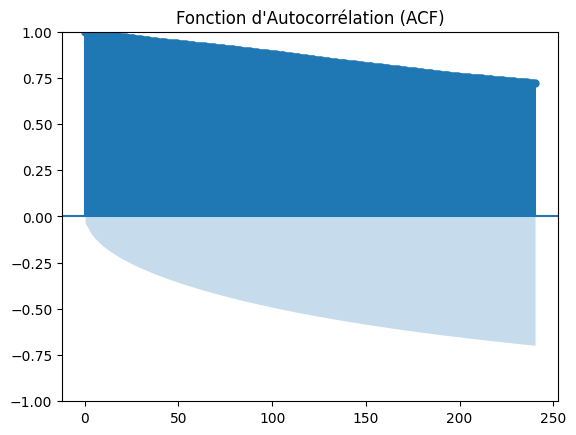

<Figure size 640x480 with 0 Axes>

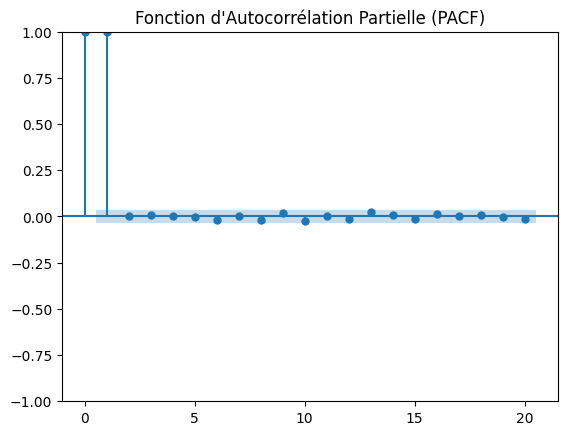

In [42]:
plt.figure()
plot_acf(apple, lags=240)
plt.title('Fonction d\'Autocorrélation (ACF)')

# Tracer PACF
plt.figure()
plot_pacf(apple, lags=20)
plt.title('Fonction d\'Autocorrélation Partielle (PACF)')
plt.show()

In [46]:
window_size = 60 
predictions = []

for end in range(window_size, len(apple)):
    train_data = apple.iloc[end-window_size:end]

    model = ARIMA(train_data, order=(1,5,9))  
    model_fit = model.fit()

    pred = model_fit.forecast()
    predictions.append(pred.values[0])

predicted_dates = apple.index[window_size:]
predictions_series = pd.Series(predictions, index=predicted_dates)

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting

KeyboardInterrupt: 

In [44]:
fig = go.Figure()

# Ajouter les valeurs réelles
fig.add_trace(go.Scatter(x = apple.index, y=apple['Close'], mode='lines', name='Valeurs Réelles'))

# Ajouter les prédictions
fig.add_trace(go.Scatter(x = predicted_dates, y = predictions_series, mode='lines', name='Prédictions ARIMA'))

# Mise à jour des titres et layout
fig.update_layout(title='Prédictions ARIMA avec Fenêtre Glissante de 2 Mois',
                  xaxis_title='Date',
                  yaxis_title='Prix de l\'Action')

# Affichage du graphique
fig.show()

In [47]:
window_size = 60
predictions = []

# Utiliser les données historiques pour démarrer la prédiction
historical_data = apple.copy()

for end in range(window_size, len(apple)):
    # Utiliser la fenêtre de données actuelle pour l'entraînement
    train_data = historical_data.iloc[end-window_size:end]
    
    # Ajuster le modèle ARIMA sur les données d'entraînement
    model = ARIMA(train_data, order=(4,0,0))  
    model_fit = model.fit()
    
    # Faire une prévision pour le point de données suivant
    pred = model_fit.forecast()
    
    # Ajouter la prédiction aux données historiques pour la prochaine itération
    historical_data = historical_data.append(pd.Series(pred.values[0], index=[historical_data.index[-1] + pd.Timedelta(days=1)]))
    
    # Stocker la valeur prédite
    predictions.append(pred.values[0])

# Créer un index pour les dates prédites, en commençant après la dernière date historique
predicted_dates = historical_data.index[window_size:]

# Convertir les prédictions en Series pour une manipulation facile
predictions_series = pd.Series(predictions, index=predicted_dates)


/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/axel/Documents/École/Université/M2/M2_S1/finance_quant/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is avai

AttributeError: 'DataFrame' object has no attribute 'append'